In [1]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sia = SentimentIntensityAnalyzer()

In [1]:
df1 = pd.read_json('../data/reddit-data/reddit_data_1.json.gz', lines=True)
df2 = pd.read_json('../data/reddit-data/reddit_data_2.json.gz', lines=True)
df = pd.concat([df1, df2], ignore_index=True)

NameError: name 'pd' is not defined

In [ ]:
df = df[(df['selftext'] != '[removed]') & (df['selftext'] != '[deleted]') & (df['subreddit'] != 'Quebec')]
df['selftext'] = df['selftext'].str.lower()
df['selftext'] = df['selftext'].replace(r'\n',' ', regex=True) 

In [ ]:
df = df[df['selftext'].str.contains(r'^\[.*\]\(.*\)$') == False]

In [ ]:
def get_score(input):
    scores = sia.polarity_scores(input)
    return scores['compound']

In [ ]:
get_scores = np.vectorize(get_score)

In [ ]:
df['score'] = get_scores(df['selftext'])

In [ ]:
sentiment_score_annual = df.groupby(['subreddit', 'year']).agg({'score': 'mean'})

In [ ]:
sentiment_score_annual.to_csv('sentiment_score_annual.csv')

In [ ]:
sentiment_score_quarterly = df

In [ ]:
sentiment_score_quarterly['date'] = pd.to_datetime(df['year'].astype(str) + df['month'].astype(str), format='%Y%m')

In [ ]:
sentiment_score_quarterly = sentiment_score_quarterly.groupby(['subreddit', sentiment_score_quarterly['date'].dt.to_period('Q')]).agg({'score': 'mean'})

In [ ]:
filtered = df[df['year'] == 2022]
subreddit_list = ['Manitoba', 'NovaScotia', 'PEI', 'alberta', 'britishcolumbia', 'newbrunswickcanada', 'newfoundland', 'ontario', 'saskatchewan']
filtered = df[df['subreddit'].isin(subreddit_list)]

In [ ]:
sns.set()

C:\Users\jocel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


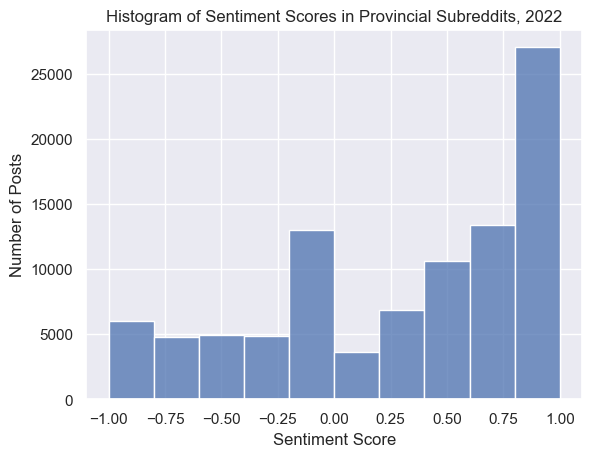

In [ ]:
sns.histplot(filtered['score'], bins=10)
plt.title("Histogram of Sentiment Scores in Provincial Subreddits, 2022")
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Posts')
plt.savefig('../plots/sentiment_score_histogram')

In [ ]:
violinplot_data = filtered[['subreddit', 'score']]

In [ ]:
violinplot_data

,subreddit,score
0,alberta,0.7934
1,saskatchewan,0.5940
2,NovaScotia,0.7184
3,alberta,0.9732
4,alberta,0.7550
...,...,...
97756,ontario,-0.4588
97758,ontario,0.0000
97759,newfoundland,-0.9491
97760,newfoundland,-0.7470


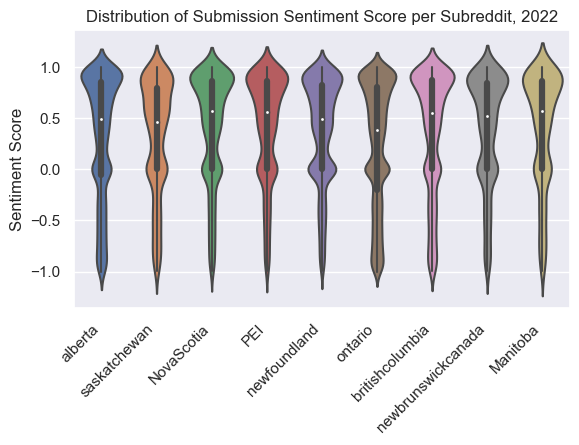

In [ ]:
ax = sns.violinplot(x="subreddit", y="score", data=violinplot_data)
ax.set(ylabel='Sentiment Score', xlabel='', title='Distribution of Submission Sentiment Score per Subreddit, 2022')
plt.xticks(rotation=45,ha='right')
plt.gcf().subplots_adjust(bottom=0.3)
plt.savefig(''../plots/sentiment_score_violinplot')